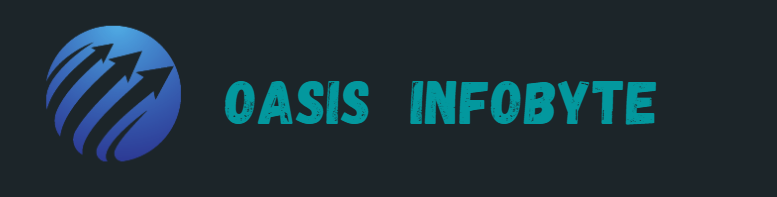

# Task5: Sales Prediction using Python

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## Reading DataFrame

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Dataframe Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Descriptive Statistics

In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Drop Unnamed Column

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## #Target Column

## Sales

In [7]:
df['Sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

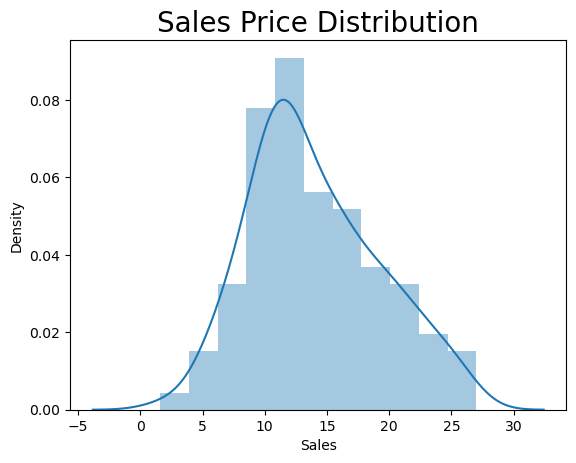

In [8]:
sns.distplot(df['Sales'])
plt.title('Sales Price Distribution',size=20)
plt.show()

<Axes: xlabel='Sales'>

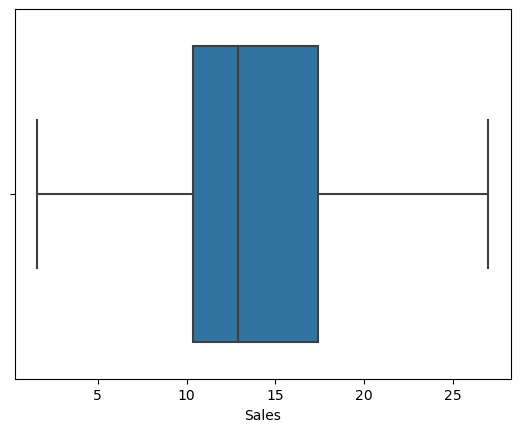

In [9]:
sns.boxplot(data=df,x='Sales')

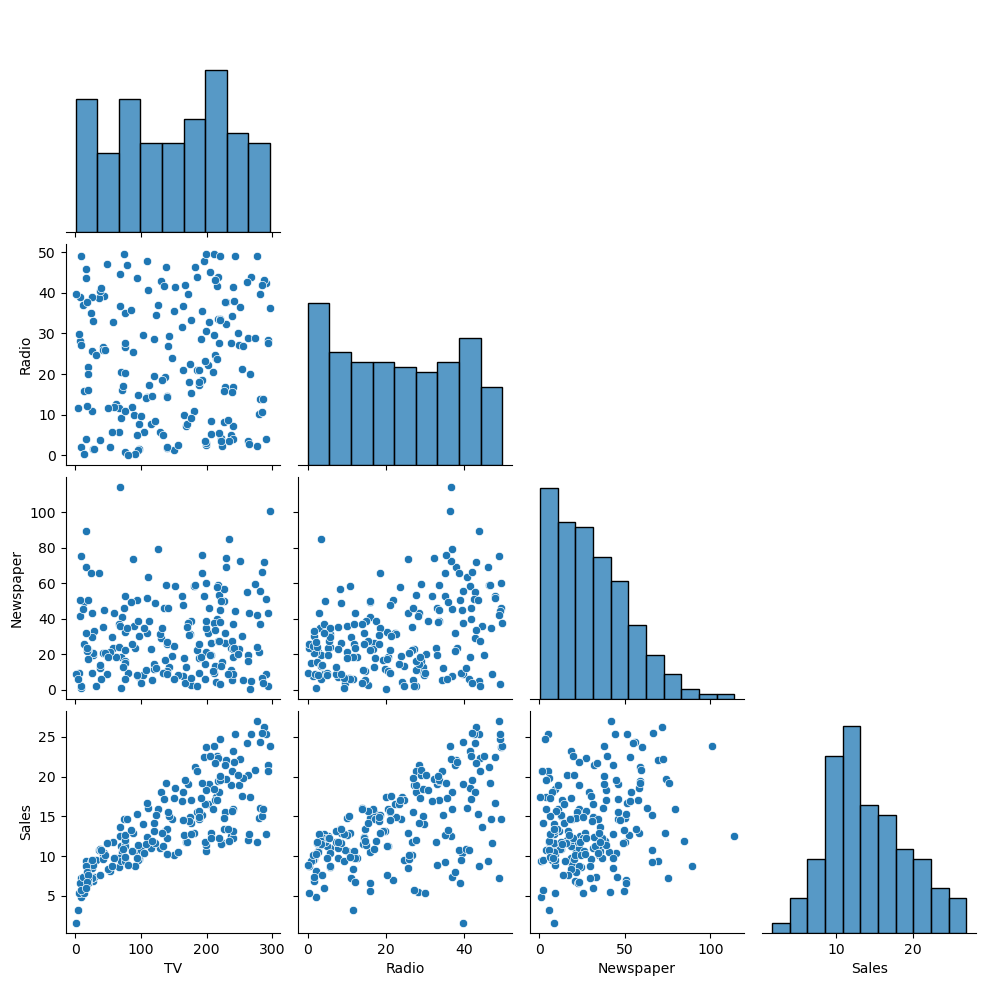

In [10]:
sns.pairplot(df,corner=True)

## #Independant Features

## TV

In [11]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

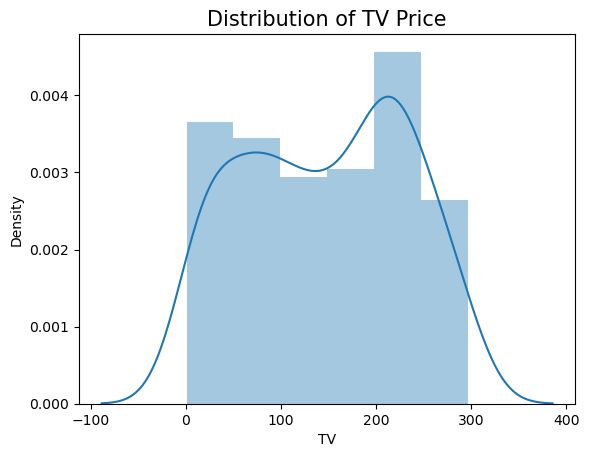

In [12]:
sns.distplot(df['TV'])
plt.title("Distribution of TV Price",size=15)
plt.show()

## Newspaper

In [13]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

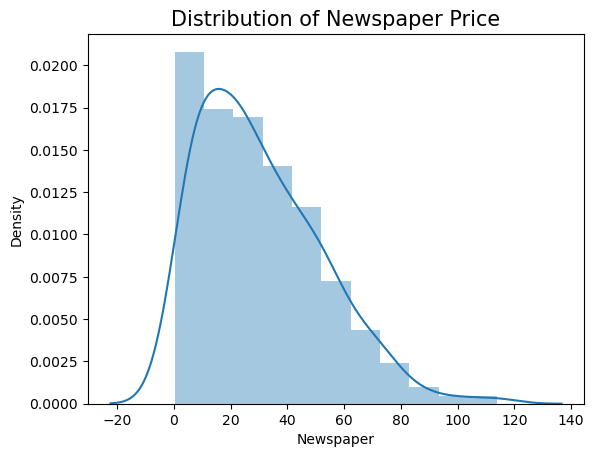

In [14]:
sns.distplot(df['Newspaper'])
plt.title("Distribution of Newspaper Price",size=15)
plt.show()

## Radio

In [15]:
df['Radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

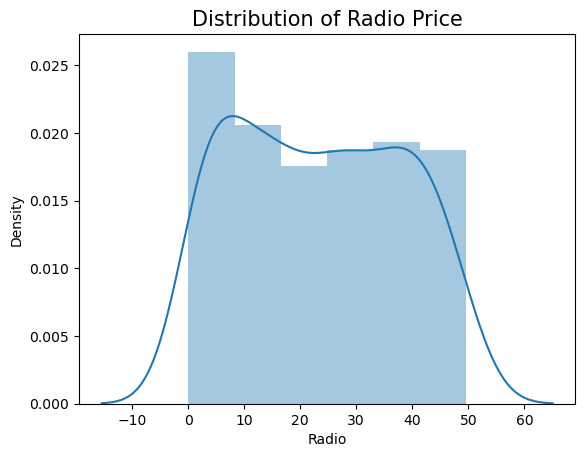

In [16]:
sns.distplot(df['Radio'])
plt.title("Distribution of Radio Price",size=15)
plt.show()

## Correlation Matrix

<Axes: >

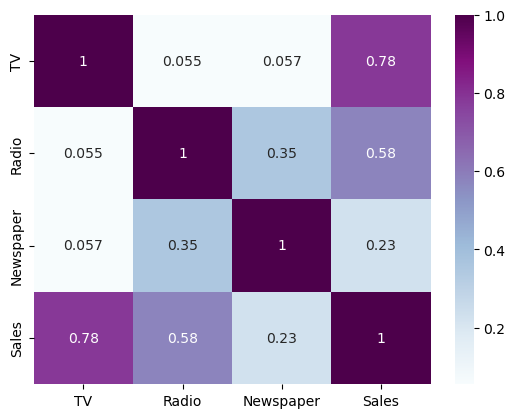

In [17]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

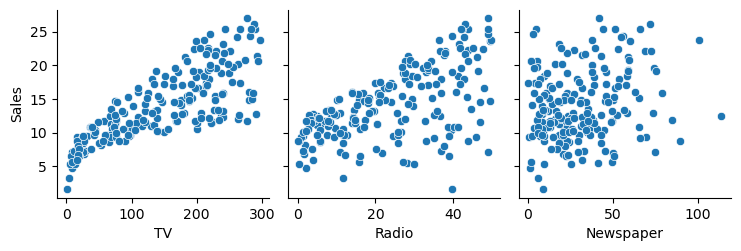

In [18]:
sns.pairplot(df, x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="scatter")

## Spliting DataFrame

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## train_test_split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Model Building

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
ypred = linreg.predict(X_test)

## Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
mae = mean_absolute_error(y_test,ypred)
mse = mean_squared_error(y_test,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test,ypred)

print(f"MAE :- {mae}\nMSE :- {mse}\nRMSE :- {rmse}\nAccuracy :- {r2}")

MAE :- 1.0548328405073326
MSE :- 1.9289249074665729
RMSE :- 1.3888574107756968
Accuracy :- 0.9224605706201435


In [23]:
linreg.intercept_

2.937215734690609

In [24]:
linreg.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [25]:
pd.DataFrame(linreg.coef_ , index = x.columns, columns=["Coefficients"])

,Coefficients
TV,0.046952
Radio,0.176586
Newspaper,0.001851


## Residue Plot

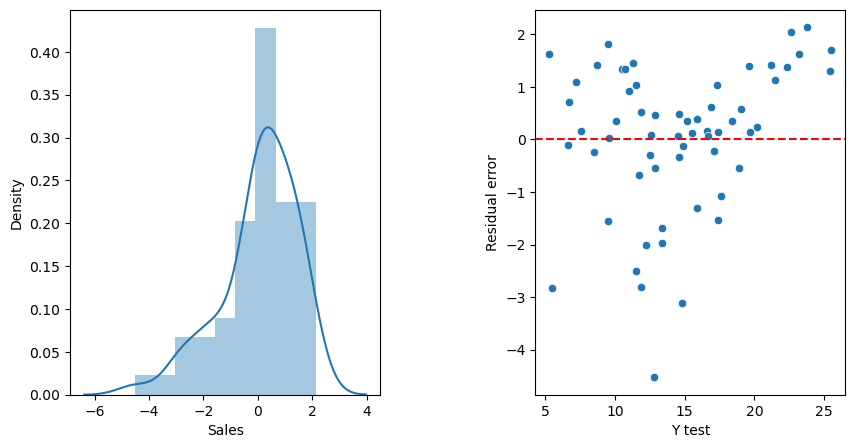

In [26]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=y_test,y= residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Y test')
axes[1].set_ylabel('Residual error')
fig.subplots_adjust(wspace=0.5)

### Checking Training and Testing Accuracy

In [27]:
train=linreg.score(X_train,y_train)
test=linreg.score(X_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Train:-0.8850053786777522
Test:-0.9224605706201435


### Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size = 0.2,random_state=42)
# xp_train=sc.fit_transform(xp_train)
# xp_test=sc.transform(xp_test)

linregp=LinearRegression()
linregp.fit(xp_train,yp_train)
ypred=linregp.predict(xp_test)

In [29]:
mae_poly=mean_absolute_error(yp_test,ypred)
rmse_poly=np.sqrt(mean_absolute_error(yp_test,ypred))
R2score_poly=r2_score(yp_test,ypred)

print(f'Mean Absolute Error:= {mae_poly}')
print(f'Root Mean Square Error:= {rmse_poly}')
print(f'R2 Score:= {R2score_poly}')
print()
train=linregp.score(xp_train,yp_train)
test=linregp.score(xp_test,yp_test)
print(f'Train: {train}')
print(f'Test: {test}')

Mean Absolute Error:= 0.5261794444044152
Root Mean Square Error:= 0.7253822746693052
R2 Score:= 0.9869181490609594

Train: 0.986104518792419
Test: 0.9869181490609594


## RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators = 100,
                              random_state = 1,
                              n_jobs = -1)
rfr.fit(X_train,y_train)
ypred=rfr.predict(X_test)

mae_rf=mean_absolute_error(y_test,ypred,)
rmse_rf=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score_rf=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae_rf}')
print(f'Root Mean Square Error:--{rmse_rf}')
print(f'R2 Score:--{R2score_rf}')
print()
train=rfr.score(X_train,y_train)
test=rfr.score(X_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Mean Absolute Error:--0.5148166666666663
Root Mean Square Error:--0.7175072589644416
R2 Score:--0.9829154738855898

Train:-0.9960099173152264
Test:-0.9829154738855898


In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
print(tabulate(pd.DataFrame(data={"R2 Score":[r2*100,R2score_poly*100,R2score_rf*100],"RMSE":[rmse,rmse_poly,rmse_rf],"MAE":[mae,mae_poly,mae_rf]},index=["Multi-Variable Regression","Polynomial Regression","RandomForest"]), headers="keys", tablefmt='fancy_grid'))

╒═══════════════════════════╤════════════╤══════════╤══════════╕
│                           │   R2 Score │     RMSE │      MAE │
╞═══════════════════════════╪════════════╪══════════╪══════════╡
│ Multi-Variable Regression │    92.2461 │ 1.38886  │ 1.05483  │
├───────────────────────────┼────────────┼──────────┼──────────┤
│ Polynomial Regression     │    98.6918 │ 0.725382 │ 0.526179 │
├───────────────────────────┼────────────┼──────────┼──────────┤
│ RandomForest              │    98.2915 │ 0.717507 │ 0.514817 │
╘═══════════════════════════╧════════════╧══════════╧══════════╛


## Function Created for new prediction

In [33]:
def Sales_pred():
    TV=float(input('Cost for TV Advertising:-'))
    Radio= float(input('Cost for Radio Advertising:-'))
    Newspaper= float(input('Cost for Newspaper Advertising:-'))
    newobs=[[TV,Radio,Newspaper]]
    yp = linregp.predict(poly.transform(newobs))[0]
    print(f"Sales: {yp}")
    return yp

In [34]:
Sales_pred()

Cost for TV Advertising:-44.5
Cost for Radio Advertising:-39.5
Cost for Newspaper Advertising:-45.1
Sales: 10.529982056207494


10.529982056207494

## Thank You